# Startup Success and Failure Analysis

The purpose of this project is to find out the success and failure factors behind startup companies. To that end, I am going to investigate a dataset provided by [Metric.am](https://metric.am/), containing information about 472 startups and their statuses: *'Success'* or *'Failed'*. 

In [79]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


## Understanding and Preprocessing Data

In [80]:
!wget -O data.csv https://raw.githubusercontent.com/Metricam/Internship_tasks/master/Startup_Success/data.csv

--2024-04-08 22:23:07--  https://raw.githubusercontent.com/Metricam/Internship_tasks/master/Startup_Success/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315563 (308K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 308.17K  1.65MB/s    in 0.2s    

2024-04-08 22:23:08 (1.65 MB/s) - ‘data.csv’ saved [315563/315563]



In [81]:
!wget -O dictionary.csv https://raw.githubusercontent.com/Metricam/Internship_tasks/master/Startup_Success/dictionary.csv

--2024-04-08 22:23:08--  https://raw.githubusercontent.com/Metricam/Internship_tasks/master/Startup_Success/dictionary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5183 (5.1K) [text/plain]
Saving to: ‘dictionary.csv’

dictionary.csv      100%[===================>]   5.06K  --.-KB/s    in 0s      

2024-04-08 22:23:09 (20.4 MB/s) - ‘dictionary.csv’ saved [5183/5183]



In [82]:
missing=["No Info","None","none"]
df=pd.read_csv("data.csv",na_values=missing, encoding='latin-1')

In [83]:
df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Last Funding Date,Last Funding Amount,Country of company,Continent of company,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Years of education,Specialization of highest education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,google page rank of company website,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Industry trend in investing,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),"Survival through recession, based on existence of the company through recession times",Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Gartner hype cycle stage,Time to maturity of technology (in years),Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,NaN,NaN,-1.0,Video distributi

In [84]:
cols=["Percent_skill_Entrepreneurship","Percent_skill_Operations","Percent_skill_Engineering","Percent_skill_Marketing","Percent_skill_Leadership",
       'Percent_skill_Data Science', 'Percent_skill_Business Strategy',
       'Percent_skill_Product Management', 'Percent_skill_Sales',
       'Percent_skill_Domain', 'Percent_skill_Law', 'Percent_skill_Consulting',
       'Percent_skill_Finance', 'Percent_skill_Investment', 'Renown score']

In [85]:
print("Shape of the dataset is {} rows and {} columns" .format(len(df),len(df.columns)))


Shape of the dataset is 472 rows and 116 columns


Here we can see that we have 472 startups with 116 feachures

In [86]:
# renaming long column names to short ones :
df.rename(columns={'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive'
                   :"Capital intensive business", 'Survival through recession, based on existence of the company through recession times':
                  "Survival through recession", "Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?"
                  :"Top forums talking about company/Model"},inplace=True)

In [87]:
# converting  Est. Founding Date and Last Funding Date from object to datetime
df["Est. Founding Date"]=pd.to_datetime(df["Est. Founding Date"])
df["Last Funding Date"]=pd.to_datetime(df["Last Funding Date"])
# converting Last round of funding received (in milionUSD) from object to float
# it is object variable because it consists of a string "unknown amount" in it,so replacing it with nan and converting
# the particular column to float
df["Last round of funding received (in milionUSD)"].replace({"unknown amount":np.nan},inplace=True)
df["Last round of funding received (in milionUSD)"]=df["Last round of funding received (in milionUSD)"].astype(float)

Create numerical target column where '1' means success and '0' means failure.

In [88]:
df['Target'] = df['Dependent-Company Status'].map( {'Failed': 0, 'Success': 1} )


In [89]:
# data types in the data set
dtypes=pd.DataFrame(df.dtypes,columns=["Data Types"])
dtypes


,Data Types
Company_Name,object
Dependent-Company Status,object
year of founding,float64
Age of company in years,float64
Internet Activity Score,float64
Short Description of company profile,object
Industry of company,object
Focus functions of company,object
Investors,object
Employee Count,float64


We can see that the data type of some of the columns are incorrect so we have to correct the data types of the columns
but before correcting the data type we have to fill the missing values by nan values and then replace the nan values with suitable method [mean,mode etc. ] so that the data types can be changed int,float or datetime etc.

In [90]:
# checking for null values in the dataset
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 


,Null Values,% Missing Values
Company_Name,0,0.000000
Dependent-Company Status,0,0.000000
year of founding,59,12.500000
Age of company in years,59,12.500000
Internet Activity Score,65,13.771186
Short Description of company profile,149,31.567797
Industry of company,124,26.271186
Focus functions of company,30,6.355932
Investors,140,29.661017
Employee Count,166,35.169492



- Columns which have more that 40% of missing values
- Number of of Partners of company (81.56%)
- Degree from a Tier 1 or Tier 2 university? (49.15%)
- Top management similarity (59.7458)
- Number of of Research publications (70.76%)
- Employee benefits and salary structures (74.36%)
- Client Reputation (58.05%)
- Employees count MoM change (43.43%)

We need to drop the columns which have more that 40% missing values in it,so we will drop those columns.


Strategy for missing values
- We need to impute the missing values in columns which have less that 40% missing values.
- Impute the missing values as per the data type and the distribution of the particular variable.
- If the variable is continous then impute the missing value by Mean,Median based on the distribution of the variable.
- And if the varibale is categorical then impute the missing value by using Mode of the variable.

In [91]:
describe=df.describe(include =['float', 'int'])
describe.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)


,count,mean,std,min,25%,50%,75%,max
year of founding,413.000000,2009.394673,2.607247,1997.000000,2008.000000,2010.000000,2011.000000,2013.000000
Age of company in years,413.000000,4.605327,2.607247,1.000000,3.000000,4.000000,6.000000,17.000000
Internet Activity Score,407.000000,114.159705,225.651419,-725.000000,-3.500000,60.000000,216.000000,1535.000000
Employee Count,306.000000,31.408497,62.673600,0.000000,4.250000,13.000000,31.000000,594.000000
Employees count MoM change,267.000000,-1.299625,23.967085,-100.000000,0.000000,0.000000,6.000000,50.000000
Last Funding Amount,312.000000,6379489.435897,9901621.781409,10000.000000,750000.000000,2800000.000000,7850000.000000,77000000.000000
Number of Investors in Seed,423.000000,1.546099,2.959782,0.000000,0.000000,0.000000,2.000000,24.000000
Number of Investors in Angel and or VC,423.000000,0.576832,1.396723,0.000000,0.000000,0.000000,0.000000,9.000000
Number of Co-founders,472.000000,1.868644,1.143481,0.000000,1.000000,2.000000,2.250000,7.000000
Number of of advisors,472.000000,1.016949,2.014736,0.000000,0.000000,0.000000,1.000000,13.000000


Columns with very high range of values
- Last Funding Amount
- google page rank of company website
- As the values in this columns take very large range as compared to other features in the dataset we will have to scale down the vlaues in this columns.

In [92]:
# filling the missing values with nan values in the data set
df=df.fillna(np.nan)

As we can see that some of the columns contain multiple values which have same meaning so we have to replace these values
Cloumns which have such values
Has the team size grown ['No' 'Yes' 'yes' 0 'YES' nan]
replacing "yes","YES" ----> "Yes"
Cloud or platform based serive/product? ['Platform' 'cloud' 'Cloud' 'none' 'Both' 0]
replacing "cloud" ----> "Cloud"
Local or global player ['Global' 'Local' 'local' 'global' 'GLOBAL' 'LOCAL' 0 'GLObaL' 'local ']
replacing "local","LOCAL" ----> "Local"
replacing "GLOBAL","GLObaL","global" ----> "Global"

In [93]:
# some of the columns contain multiple values which have same meaning so we have to change those values
df["Has the team size grown"]=df["Has the team size grown"].replace({"yes":"Yes","YES":"Yes"})
df["Cloud or platform based serive/product?"]=df["Cloud or platform based serive/product?"].replace({"cloud":"Cloud"})
df["Local or global player"]=df["Local or global player"].replace({"local  ":"Local","local":"Local","LOCAL":"Local","global":"Global",
                                                                  "GLObaL":"Global","GLOBAL":"Global"})


## Data Analysis

### Company Status

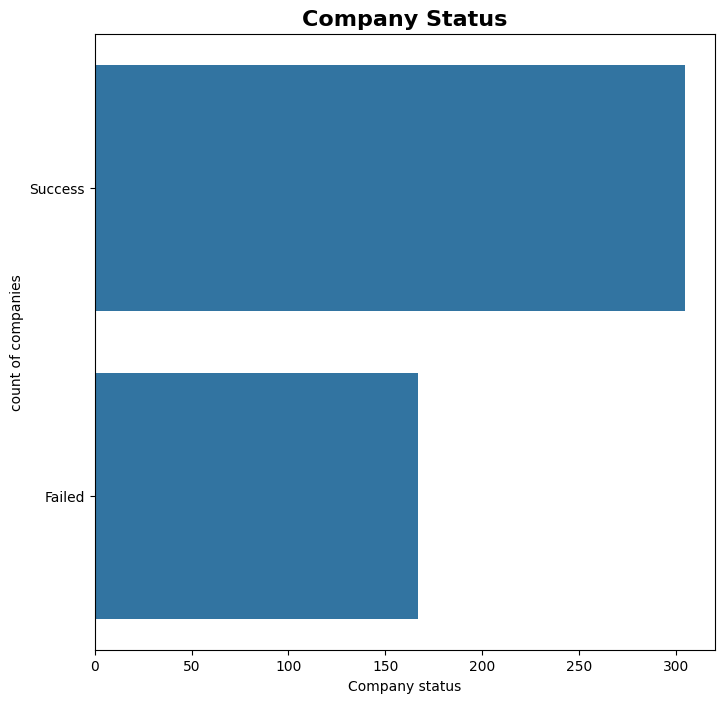

In [94]:
# checking the dependent variable --> `Company status`
plt.figure(figsize=(8,8))
ax=sns.countplot(df["Dependent-Company Status"])
plt.title("Company Status",{'fontsize':16,
        'fontweight':"bold"})

plt.ylabel("count of companies")
plt.xlabel("Company status")
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)



Here we can see that most companies succed but we need to analyse and understand the factors

### Initial Success Predictions

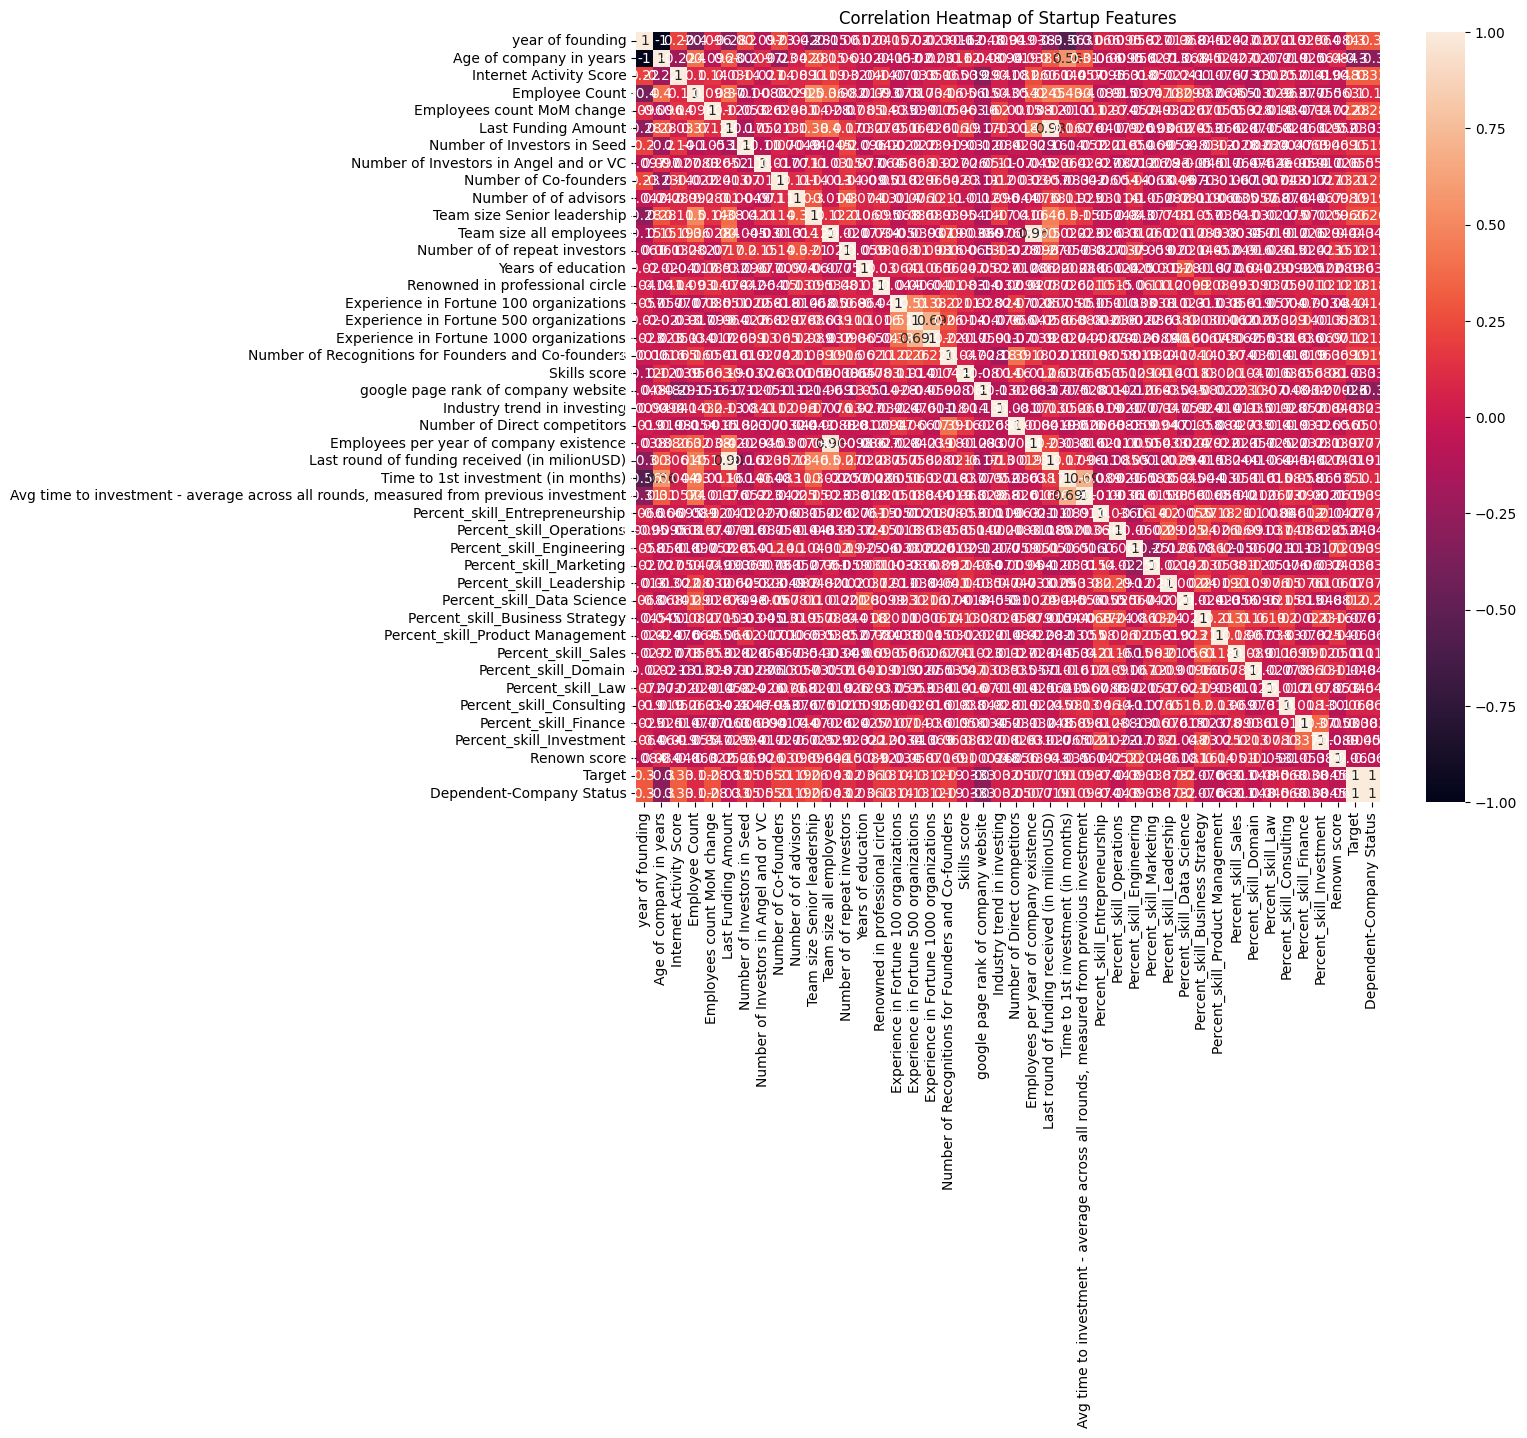

In [98]:
filtered_df = df.select_dtypes(include=[int, float]).copy()

filtered_df['Dependent-Company Status'] = df['Dependent-Company Status'].map({'Success': 1, 'Failed': 0})

correlation_matrix = filtered_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket')
plt.title('Correlation Heatmap of Startup Features')
plt.show()

- year of funding Amount vs. Dependent-Company Status: There is a weak negative correlation (-0.033), suggesting that higher funding amounts might not guarantee success.

- Number of Co-founders vs. Employee Count: The correlation is weakly negative (-0.022), indicating that a higher number of co-founders might not significantly influence success.

- Positive Correlations: Various factors such as Employee Count, Internet Activity Score, Number of Co-founders, Number of Advisors, and Team Size Senior Leadership show positive correlations with Dependent-Company Status. This suggests that larger teams, higher internet activity, and experienced leadership are associated with success.

- Strongest Positive Correlation: The strongest positive correlation (0.5) is observed between Team Size Senior Leadership and Employee Count, indicating that companies with larger senior leadership teams tend to have more employees.

- Perfect Correlation: The Dependent-Company Status is perfectly correlated with itself (1.0), as it represents the success or failure of the company.

- ~85% of global players succeed
- startups with medium and high number of sales support material succeed in more than ~85% of cases
- focus on consumer data is also relatively good predictor of success in ~80% of cases
- at least few partners of company are very good
- machine learning, predictive nalytics, Big Data business has more than 80% chance to succeed
- B2B has significant correlation with success while B2C has lower correlation with success
- high experience in selling and building products and high number of research publications is more than 90% correlated with success

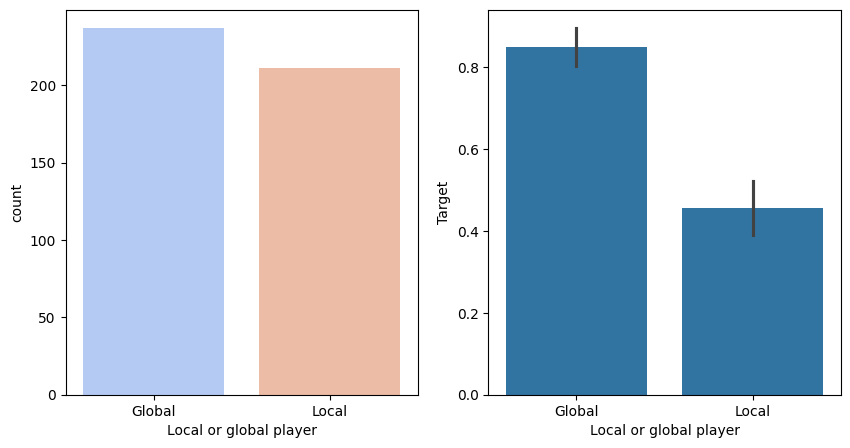

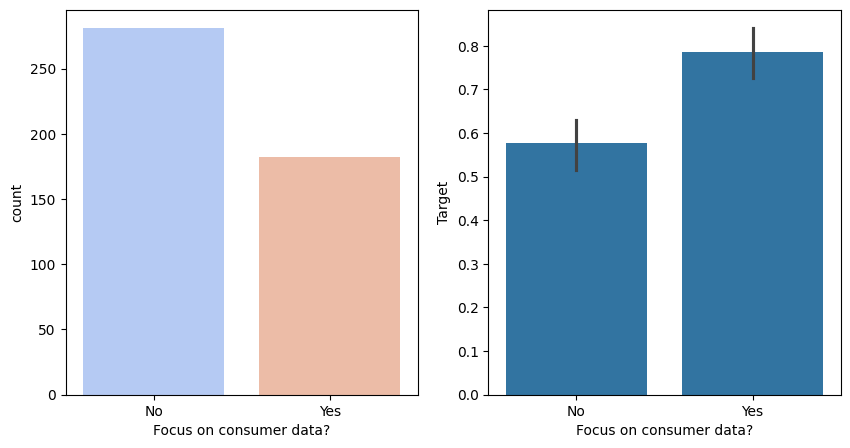

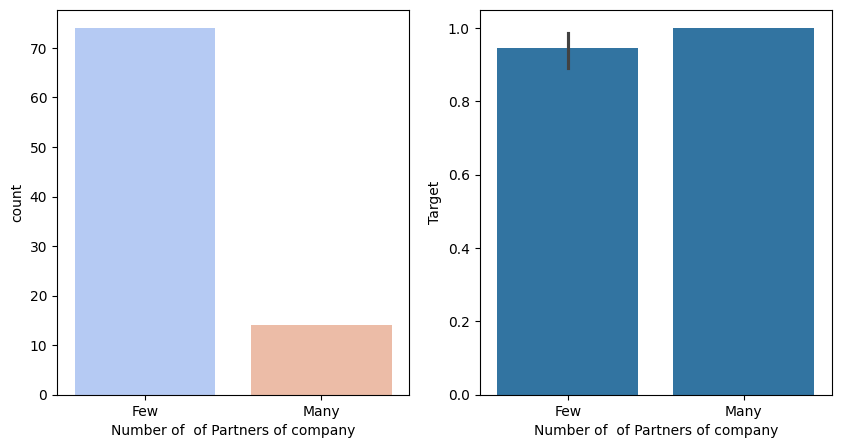

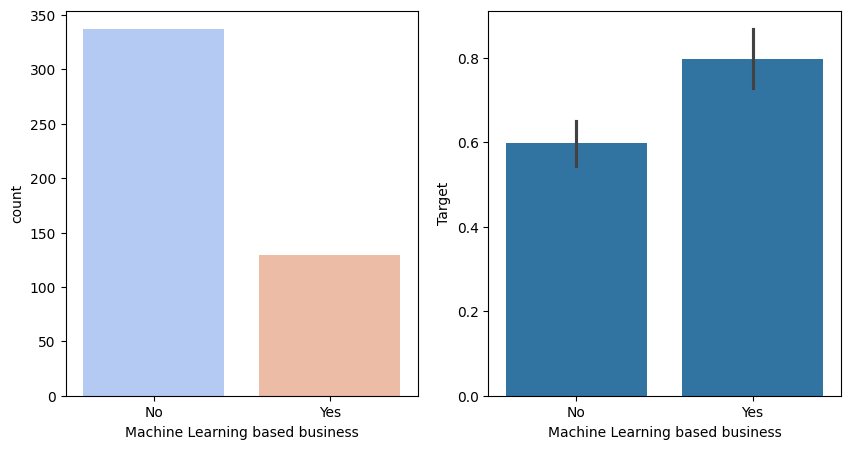

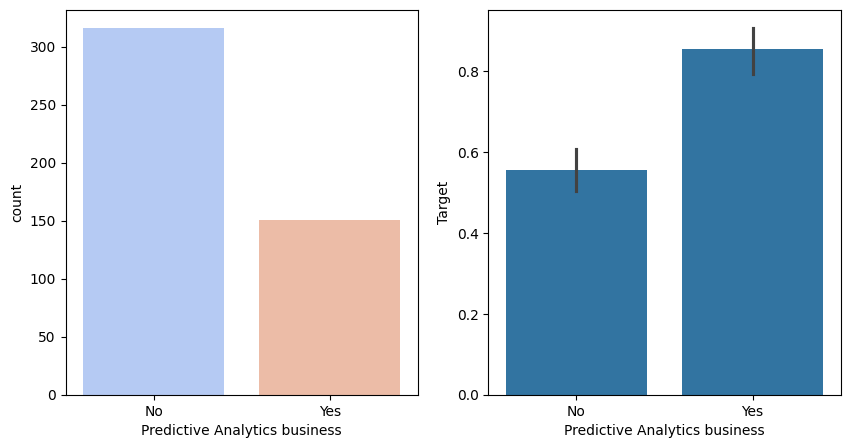

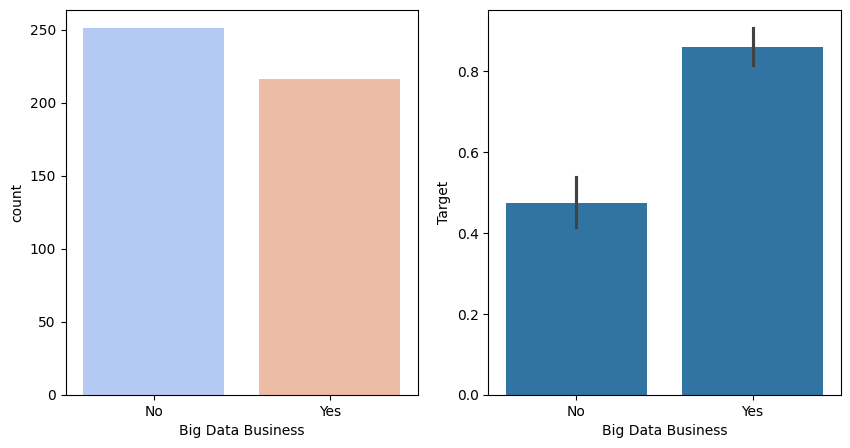

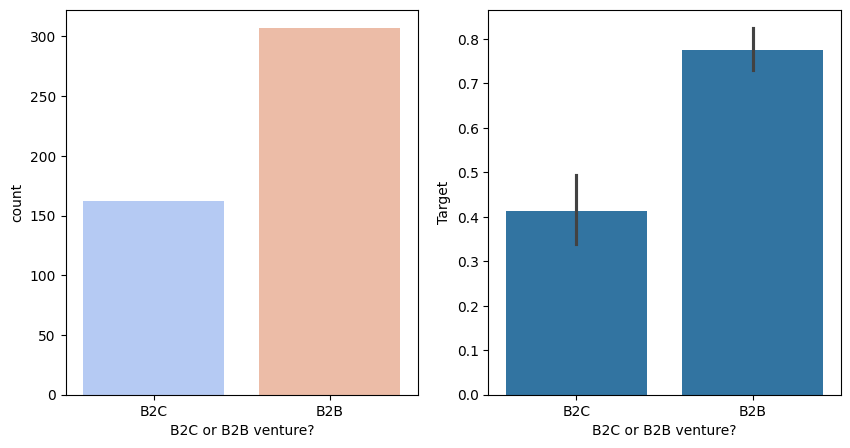

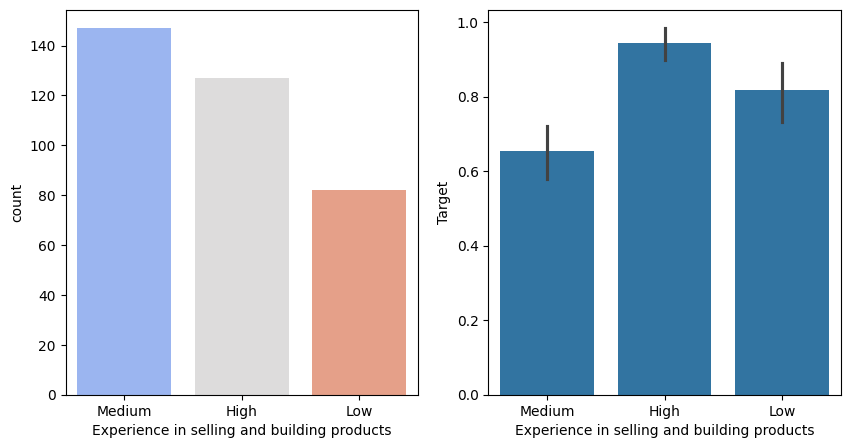

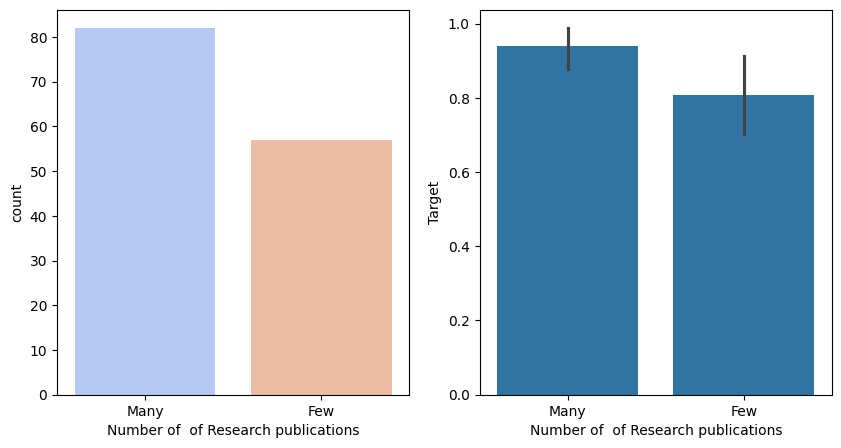

In [99]:
features = ['Local or global player', 'Focus on consumer data?', 
            'Number of  of Partners of company', 'Machine Learning based business', 'Predictive Analytics business',
            'Big Data Business', 'B2C or B2B venture?', 'Experience in selling and building products', 'Number of  of Research publications']

for attr_name in features:
    fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

    df[attr_name].fillna(df[attr_name].dropna().mode(), inplace=True)
    
    sns.countplot(x=attr_name, data=df, ax=axis1,  palette="coolwarm")

    # average
    sns.barplot(x=attr_name, y='Target', data=df, ax=axis2)

### Success based on the year of founding

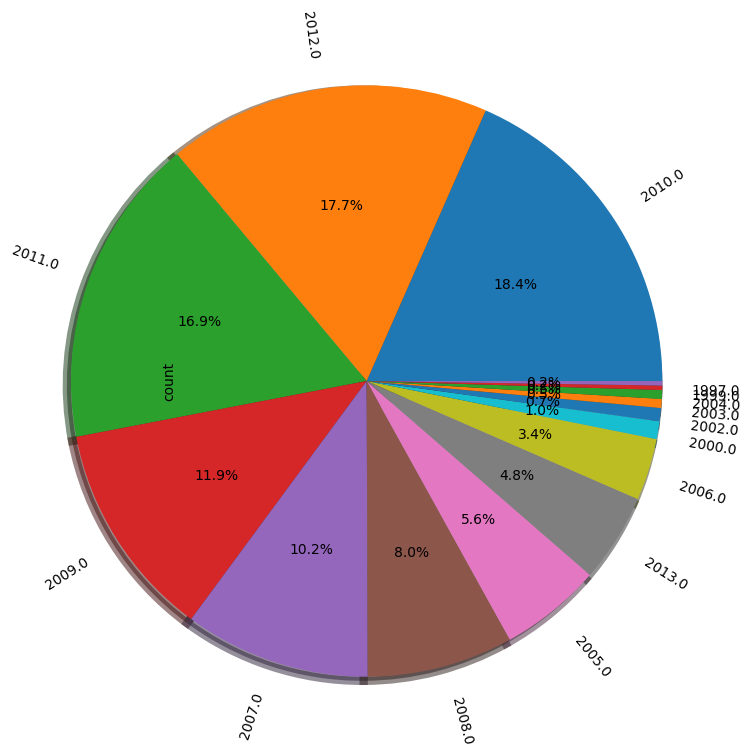

In [100]:
(df["year of founding"].value_counts()).plot.pie(autopct="%.1f%%", 
                                                    shadow=True,rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},
                                                    radius=2
                                                    )
plt.show()

**Inferences from the above chart**

Pie Chart

- 55% of the startups were started in the years 2010,2011 and 2012.
- Rest 45% of the startups were founded in remaining years.
- In colclusion we can say that the craze of founding or starting a company was at its peak between the year 2009 and year 2012

### Age of company in years


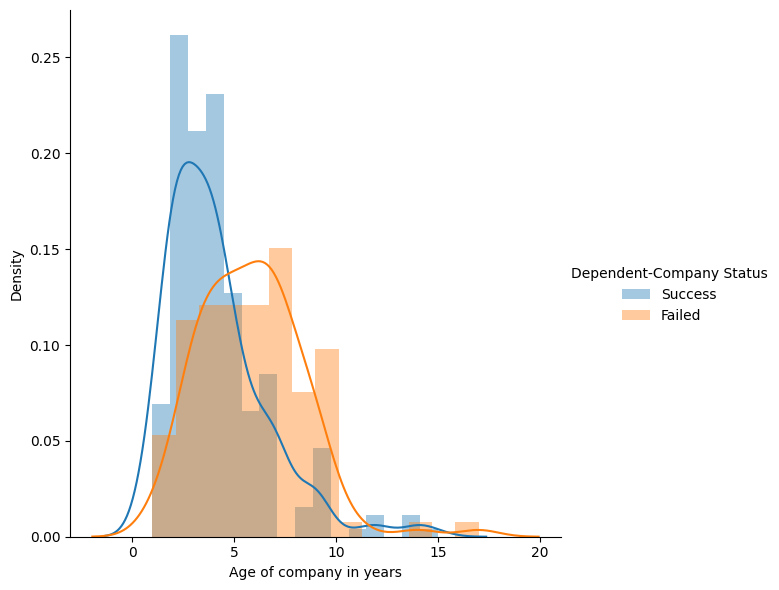

In [101]:
sns.FacetGrid(df,hue='Dependent-Company Status',height=6)\
    .map(sns.distplot,'Age of company in years')\
    .add_legend()
plt.show()

**Distribution plot**
- From the distribution plot above we can infer that the Average age of the companies which have succeded is less than the age of companies which have failed.
- In other words the companies or startups which have been founded recently are more successful as compared to the older startups.

### Continent of company

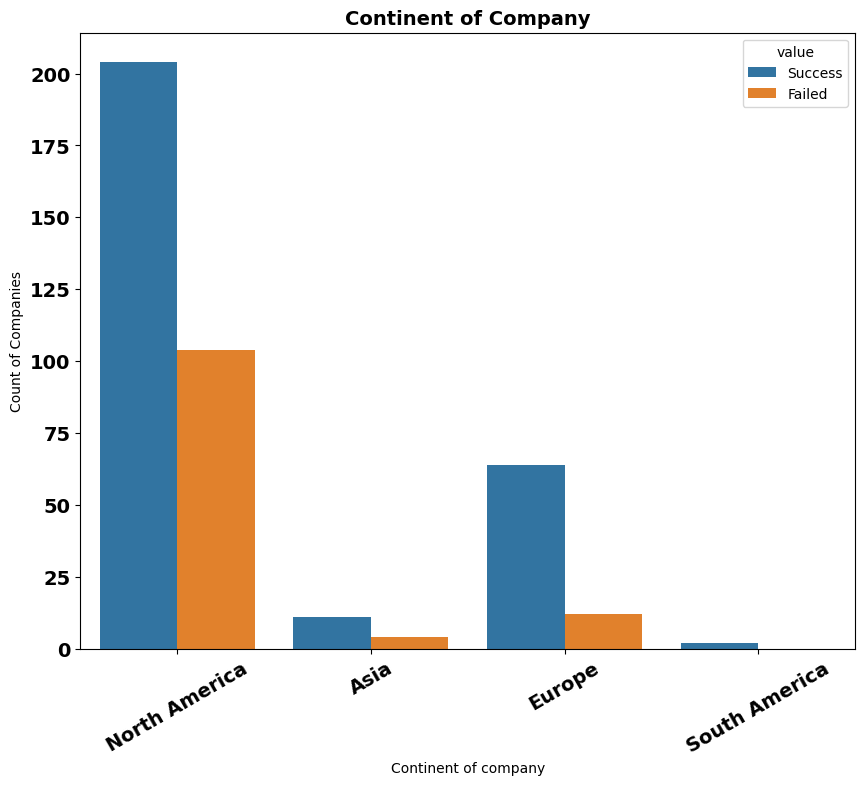

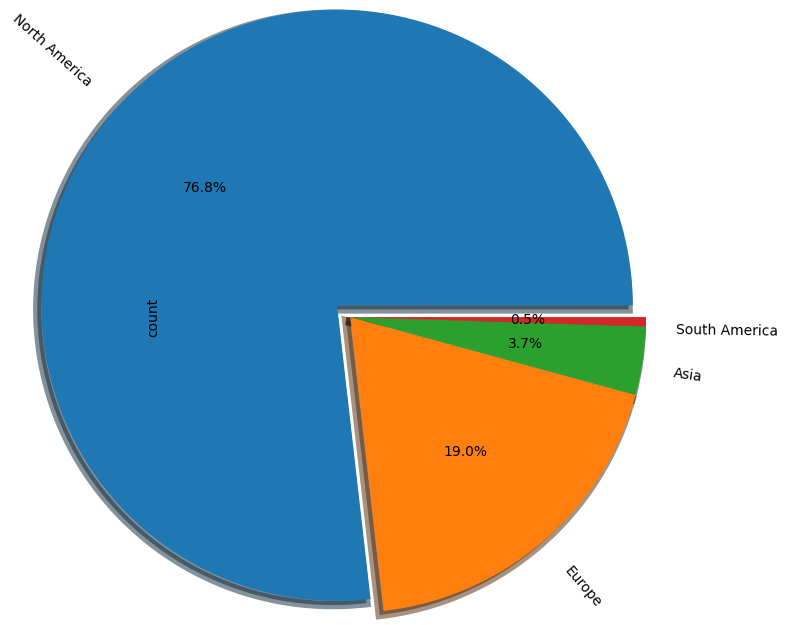

In [102]:
font={'weight' : 'bold',
        'size': 14}

# Reshape the DataFrame into long-form data
df_long = pd.melt(df, id_vars=["Continent of company"], value_vars=["Dependent-Company Status"])

# Plot using seaborn countplot with hue
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_long, x="Continent of company", hue="value")
plt.title("Continent of Company", **font)
plt.ylabel("Count of Companies")
plt.xticks(rotation=30, **font)
plt.yticks(**font)
plt.show()


df["Continent of company"].value_counts().astype(int).plot.pie(autopct="%.1f%%",explode=[0.12,0.0,0.0,0.0], 
                                                    shadow=True,rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},radius=2,
                                                    )

plt.show()


- From the graphs above it is clear that most of the startups that are founded in North America are the most successfull. Hence, it is a good idea to begin startup in the North America.
- The continent followed by North America is Europe which contributes about 19% of the total share. Only 2.5% of startups were started in India(the country is still poor, but indian programmers are everywhere ^_^)

### Internet Activity Score

<Figure size 1000x1000 with 0 Axes>

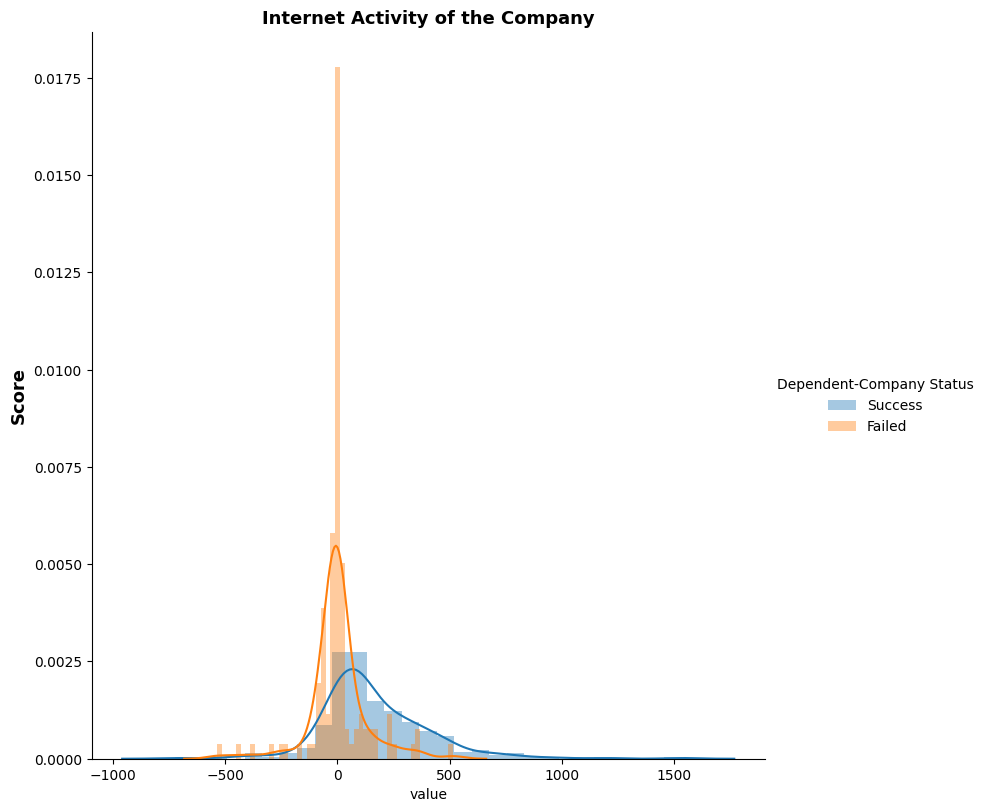

In [103]:
font={'weight' : 'bold',
        'size': 13}
plt.figure(figsize=(10,10))


# Reshape the DataFrame into long-form data
df_long = pd.melt(df, id_vars=["Dependent-Company Status"], value_vars=["Internet Activity Score"])

# Plot using seaborn FacetGrid with hue
g = sns.FacetGrid(df_long, hue="Dependent-Company Status", height=8)
g.map(sns.distplot, 'value')
g.add_legend()
plt.title("Internet Activity of the Company", **font)
plt.ylabel("Score", **font)
plt.show()



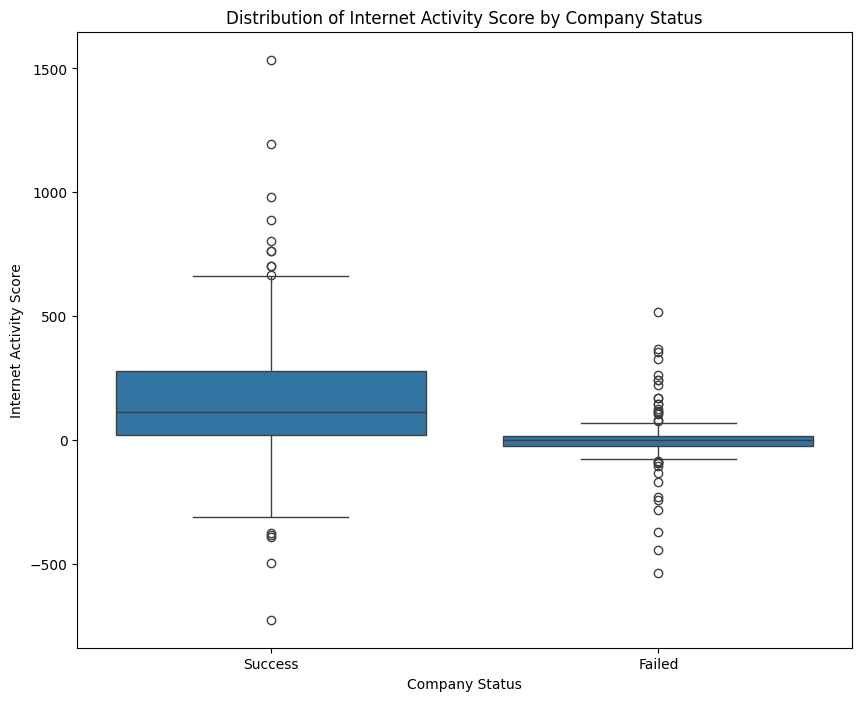

                          count        mean         std    min    25%    50%  \
Dependent-Company Status                                                       
Failed                    123.0    2.300813  128.618507 -535.0 -24.00    0.0   
Success                   284.0  162.605634  241.089604 -725.0  21.25  115.0   

                             75%     max  
Dependent-Company Status                  
Failed                     15.00   516.0  
Success                   278.75  1535.0  


In [104]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Dependent-Company Status', y='Internet Activity Score', data=df)
plt.title('Distribution of Internet Activity Score by Company Status')
plt.xlabel('Company Status')
plt.ylabel('Internet Activity Score')
plt.show()

print(df.groupby('Dependent-Company Status')['Internet Activity Score'].describe())



- Internet Activity Score specifies the activeness of the startups on the internet.
- As we can see in the figures above the companies which are successful have high internet activity score which ranges from 0-1000 as per the distribution of the successful companies.
- In contrast it is very obvious that the score of the companies which didnt succeed have very low internet activity score which also shows that they have poor online marketing strategies.
- Hence we can say that the companies which do not have good online marketing strategies may fail.

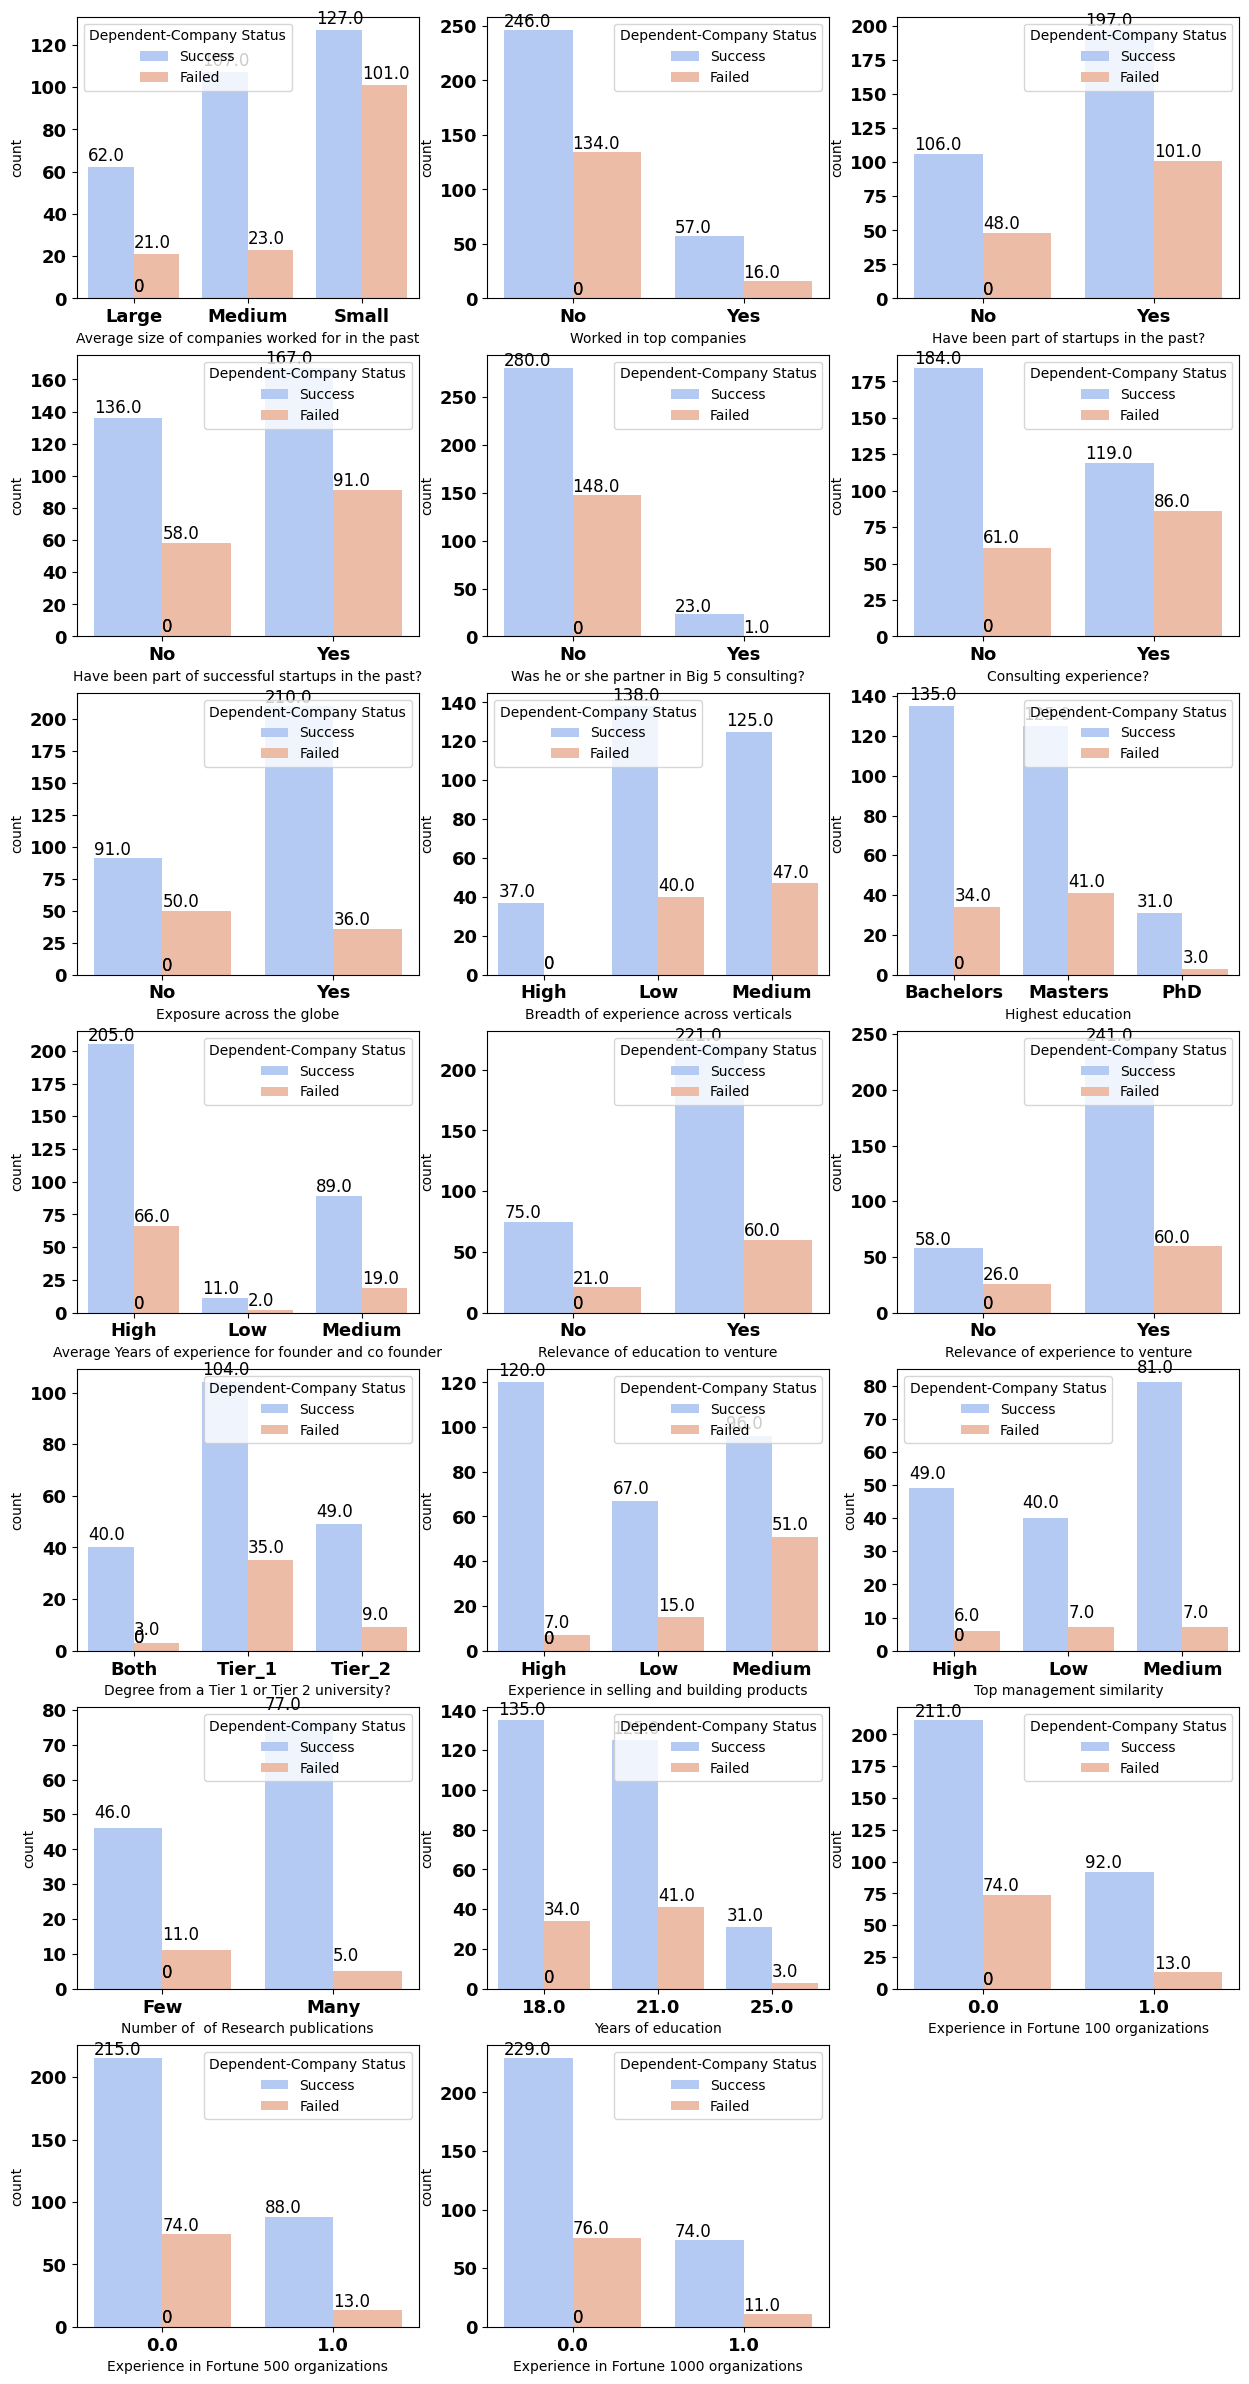

In [105]:
# Convert categorical columns to categorical data type
cat_columns=["Average size of companies worked for in the past",'Worked in top companies',
"Have been part of startups in the past?","Have been part of successful startups in the past?",
"Was he or she partner in Big 5 consulting?","Consulting experience?","Exposure across the globe",
"Breadth of experience across verticals","Highest education",'Average Years of experience for founder and co founder',
"Relevance of education to venture","Relevance of experience to venture","Degree from a Tier 1 or Tier 2 university?",
"Experience in selling and building products","Top management similarity","Number of  of Research publications","Years of education",
"Experience in Fortune 100 organizations","Experience in Fortune 500 organizations","Experience in Fortune 1000 organizations"]
for column in cat_columns:
    df[column] = df[column].astype('category')

# Plot count plots with hue
plt.figure(figsize=(15, 30))
q = 1
for j in cat_columns:
    plt.subplot(7, 3, q)
    ax = sns.countplot(data=df, x=j, palette="coolwarm", hue="Dependent-Company Status")
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(j)
    for i in ax.patches:
        ax.text(i.get_x(), i.get_height() + 3, str(round((i.get_height()), 2)), fontsize=12, color='Black')
    q += 1
plt.show()



- Startups founded by founders who worked in top companies in the past are more successfull.
- Startups founded by founders who published many research papers succeeded.
- Founders of companies which have degress from top universities are more successfull.
- Intrestingly founders who own a bachelors degree are more successfull than one who own P.hd or Masters degree.
- Founders who have more consulting experiance are more successfull.

# Model Selection

## Decision Tree

Training Accuracy(DesitionTreeClassifier): 93.37%
Test Accuracy(DesitionTreeClassifier): 85.71%

Classification Report(DesitionTreeClassifier): 
              precision    recall  f1-score   support

      Failed       0.29      0.67      0.40         3
     Success       0.97      0.87      0.92        39

    accuracy                           0.86        42
   macro avg       0.63      0.77      0.66        42
weighted avg       0.92      0.86      0.88        42



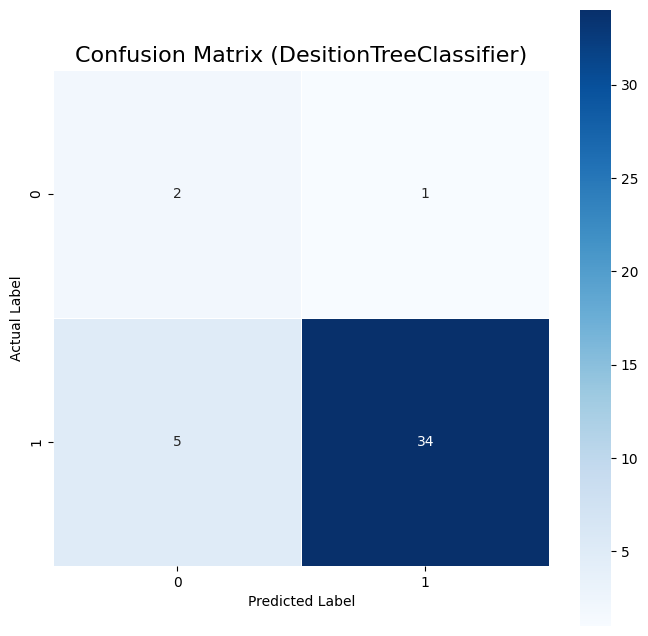

In [106]:

# Load the data
df = pd.read_csv("data.csv", encoding='latin1')

# Select numeric columns and drop rows with missing values
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf = newdf.dropna()

# Extract target variable
y = df.loc[newdf.index.to_list(), ["Dependent-Company Status"]]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(newdf, y, test_size=0.2, random_state=47)

# Define and train the classifier
rfb = DecisionTreeClassifier(random_state=42, min_samples_leaf=2, max_depth=5)
rfb.fit(X_train, y_train)

# Evaluate the classifier
def get_results_binary(clf, clf_name, x_train, y_train, x_test, y_test):
    y_pred = clf.predict(x_test)
    print('Training Accuracy('+clf_name+'): {:2.2%}'.format(accuracy_score(y_train, clf.predict(x_train))))
    print('Test Accuracy('+clf_name+'): {:2.2%}\n'.format(accuracy_score(y_test, y_pred)))
    print('Classification Report('+clf_name+'): \n' + classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix ('+clf_name+')', fontsize=16)

# Display results
get_results_binary(rfb, 'DesitionTreeClassifier', X_train, y_train, X_test, y_test)
plt.show()


Here are some conclusions that can be drawn:

- The model is performing well on the training data with an accuracy of 93.37%, indicating that it has learned the patterns present in the training data quite well.

- However, the test accuracy is slightly lower at 85.71%. This suggests that the model may be overfitting to some extent, meaning it's not generalizing as well to unseen data.

- Looking at the classification report, we can see that the model performs much better in predicting "Success" class instances compared to "Failed" class instances. This is evident from the higher precision, recall, and F1-score values for the "Success" class.

## Logistic Regression

In [107]:
#Without Hyper Parameters Tuning
#Logistic Regression
model= LogisticRegression(random_state=123)
model.fit(X_train,y_train)
#print("Best Hyper Parameters:",model1.best_params_)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.9047619047619048
Recall Score: 0.9047619047619048
Precision Score: 0.9047619047619048
Confusion Matrix:
 [[ 2  3]
 [ 1 36]]


Again high accuracy

## **Implement the RidgeRegression class for performing ridge regression with MSE loss.**

Mean Squared Error (MSE): 0.19314415165058216
Coefficients: [ 8.19478165e-01  1.47021708e-02  1.16512435e-01 -6.89765152e-02
  5.38744111e-02  9.55901391e-03 -4.15053215e-02  8.07306824e-02
  2.07738661e-02  5.41577725e-02 -5.11261192e-02 -1.67716153e-02
  6.20378407e-02 -3.01734184e-02  3.82913661e-02  5.31101825e-02
 -7.08047791e-02 -1.08855307e-02 -3.04285251e-02  1.17796462e-03
  6.00560188e-02 -8.56612716e-03  2.13401587e-02 -4.23433774e-02
  3.39421623e-02  3.75276036e-02 -9.77044307e-02 -1.85107926e-02
  3.86950011e-02 -4.74258843e-02 -1.69183039e-02 -3.82936011e-02
 -3.00569933e-02  9.25482213e-02 -1.28283398e-02 -1.15453212e-02
 -5.81544075e-02  5.91999764e-02  3.38610285e-02 -1.30680779e-02
  5.92367459e-02  5.48011049e-02  5.72723055e-03 -3.70607083e-02
  9.45146612e-02 -5.81577215e-02  1.58102435e-02  5.34515514e-03
 -1.57972593e-02 -6.34472992e-03  4.75134159e-02  4.52725738e-02
 -5.94188732e-02 -2.77303107e-02  3.97518368e-02  1.20500099e-02
 -5.28908512e-02 -9.89642237e-

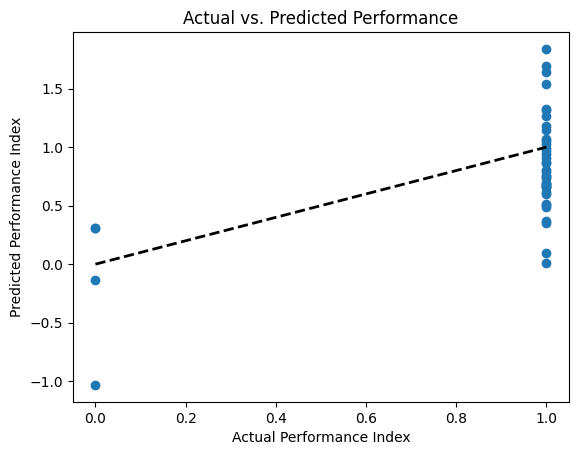

In [108]:

class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.coef_ = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        X = np.hstack((np.ones((n_samples, 1)), X))  # Add a column of ones for bias term
        A = np.dot(X.T, X) + self.alpha * np.identity(n_features + 1)
        b = np.dot(X.T, y)
        self.coef_ = np.linalg.solve(A, b)
        
    def predict(self, X):
        n_samples = X.shape[0]
        X = np.hstack((np.ones((n_samples, 1)), X))  # Add a column of ones for bias term
        return np.dot(X, self.coef_)
    
    def get_coefficients(self):
        return self.coef_
    
    def calculate_mse(self, X, y):
        y_pred = self.predict(X)
        return np.mean((y_pred - y) ** 2)
    
    def plot_performance(self, X, y):
        y_pred = self.predict(X)
        plt.scatter(y, y_pred)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
        plt.xlabel('Actual Performance Index')
        plt.ylabel('Predicted Performance Index')
        plt.title('Actual vs. Predicted Performance')
        plt.show()

# Load the data
data = pd.read_csv('data.csv', encoding='latin1')

# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns.tolist()

# If there are non-numeric columns, encode them
if non_numeric_columns:
    label_encoder = LabelEncoder()
    for column in non_numeric_columns:
        data[column] = label_encoder.fit_transform(data[column])

# Convert all columns to numeric type
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if any)
data.dropna(inplace=True)

# Extract features and target
X = data.drop(columns=['Dependent-Company Status']).values
y = data['Dependent-Company Status'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge Regression model
ridge_model = RidgeRegression(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Calculate MSE
mse = ridge_model.calculate_mse(X_test, y_test)
print("Mean Squared Error (MSE):", mse)

# Extract coefficients
coefficients = ridge_model.get_coefficients()
print("Coefficients:", coefficients)

# Visualize the model's performance
ridge_model.plot_performance(X_test, y_test)


The Mean Squared Error (MSE) is a commonly used metric to evaluate the performance of a regression model. It quantifies the average squared difference between the predicted values and the actual values. Overall, an MSE of 0.196 suggests that Ridge Regression model is providing reasonably accurate predictions for the performance indices.

In [109]:
model = RandomForestClassifier(random_state = 33)

params = {
    "n_estimators": [100, 200, 300, 400, 500],
}

model_cv = GridSearchCV(model, param_grid = params, scoring = "accuracy", cv = 5)
model_fit = model_cv.fit(X_train, y_train)

print("Best score:", model_cv.best_score_)
print("Best parameter:", model_cv.best_params_)

Best score: 0.8734402852049911
Best parameter: {'n_estimators': 100}


In [110]:
estimators = model_cv.best_params_["n_estimators"]

optimal_model = RandomForestClassifier(random_state = 33, n_estimators = estimators)
optimal_model.fit(X_train, y_train)

RandomForestClassifier(random_state=33)

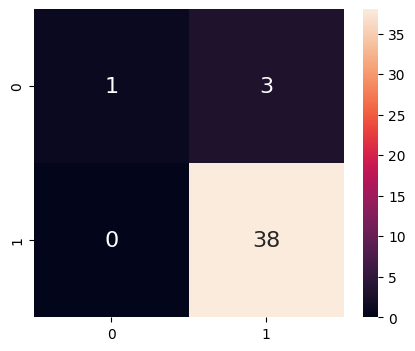

In [111]:
y_pred = optimal_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (5, 4))
sns.heatmap(conf_matrix, annot = True, annot_kws={"size": 16}, fmt = "g")
plt.show()

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.93      1.00      0.96        38

    accuracy                           0.93        42
   macro avg       0.96      0.62      0.68        42
weighted avg       0.93      0.93      0.91        42



We have a imbalance problem, since f1-score of class 0 is less compared with the class 1. However, we were able to correctly classify 93% of the labels on the test data.



I am not skilled in machine learning but still I tried to use some models that I know :)

## Thank You!